# Modelo con Precio


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df = pd.read_csv('./csv/for_price_m2_model.csv')

In [ ]:
df['log_price'] = np.log(df['price'])

In [ ]:
df.columns

Index(['Unnamed: 0', 'characteristics_bedrooms', 'characteristics_bathrooms',
       'characteristics_garages', 'characteristics_area', 'location_lat',
       'location_lng', 'price', 'neighborhood_name', 'district_name',
       'extras_Terreno', 'price_per_m2', 'rooms_per_area', 'log_price'],
      dtype='object')

In [ ]:
features = ['characteristics_bedrooms', 'characteristics_bathrooms', 'characteristics_garages',
            'characteristics_area', 'location_lat', 'location_lng', 'extras_Terreno', 'price_per_m2']

In [ ]:
X = df[features]
y = df['log_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
param_grid_alt = {
    'n_estimators': [50, 150, 250],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.15, 0.25],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}


In [ ]:
grid_search = GridSearchCV(xgb_model, param_grid_alt, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_ra...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.9, 1.0],
                         'learning_rate': [0.05, 0.15, 0.25],
                         'max_depth': [4, 6, 8], 'n_estimators': [50, 150, 250],
                         'subsample': [0.7, 0.85, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_xgb_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250, 'subsample': 0.7}


In [ ]:
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [ ]:
print(f'Error cuadrático medio (MSE) después de ajustar hiperparámetros: {mse}')
print(f'Raíz del error cuadrático medio (RMSE) después de ajustar hiperparámetros: {rmse}')

Error cuadrático medio (MSE) después de ajustar hiperparámetros: 0.006753790791467596
Raíz del error cuadrático medio (RMSE) después de ajustar hiperparámetros: 0.08218145040985585


In [ ]:
# Validación cruzada con el mejor modelo
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'RMSE medio en validación cruzada: {cv_rmse_scores.mean()}')

RMSE medio en validación cruzada: 0.09639271252655364


In [ ]:
casa_nueva = pd.DataFrame({
    'characteristics_bedrooms': [3],
    'characteristics_bathrooms': [2],
    'characteristics_garages': [2],
    'characteristics_area': [170],
    'location_lat': [-17.7675387],
    'location_lng': [-63.11527],
    'extras_Terreno': [480.0],
    'price_per_m2': [477.201708591]
})


In [ ]:
casa_nueva = pd.DataFrame({
    'characteristics_bedrooms': [3],
    'characteristics_bathrooms': [2],
    'characteristics_garages': [1],
    'characteristics_area': [200.0],
    'location_lat': [-17.7922602],
    'location_lng': [-63.1949559],
    'extras_Terreno': [184.0],
    'price_per_m2': [982.3555166191]
})

In [ ]:


prediccion_precio = best_xgb_model.predict(casa_nueva)

precio_original = np.exp(prediccion_precio)
print(f'El precio original predicho para la casa es: ${precio_original[0]:.2f}')

El precio original predicho para la casa es: $198369.25


In [ ]:
casa_nueva = pd.DataFrame({
    'characteristics_bedrooms': [4],
    'characteristics_bathrooms': [3],
    'characteristics_garages': [2],
    'characteristics_area': [254],
    'location_lat': [-17.765837436946995],
    'location_lng': [-63.201217388440114],
    'extras_Terreno': [159],
    'price_per_m2': [1006.548176793]
})


In [ ]:
casa_nueva = pd.DataFrame({
    'characteristics_bedrooms': [3],
    'characteristics_bathrooms': [1],
    'characteristics_garages': [2],
    'characteristics_area': [110],
    'location_lat': [-17.768624602981113],
    'location_lng': [-63.198995590646525],
    'extras_Terreno': [273.0],
    'price_per_m2': [1006.548176793]
})


# Modelo sin Precio

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores hiperparámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250, 'subsample': 0.85}
Error cuadrático medio (MSE) después de ajustar hiperparámetros: 0.05792300922515439
Raíz del error cuadrático medio (RMSE) después de ajustar hiperparámetros: 0.24067199509945977
RMSE en la escala original: 65998.55704189188
MAPE: 18.54910709007527%
RMSE medio en validación cruzada: 0.3061845623162305


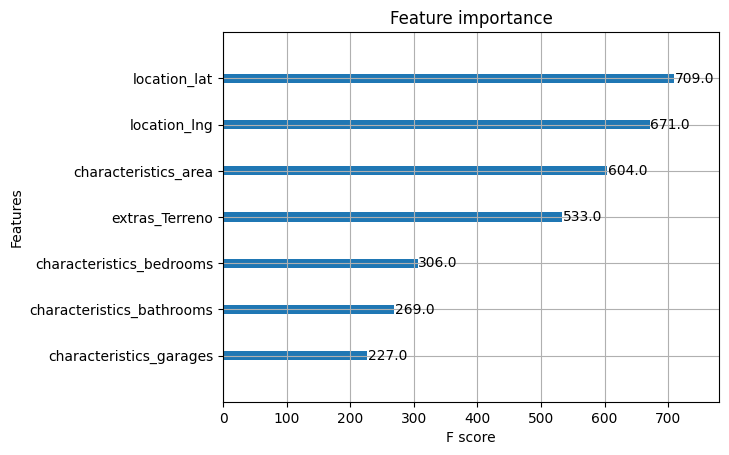

El precio original predicho para la casa es: $174941.77


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv('./csv/for_no_price_m2_model.csv')


df['log_price'] = np.log(df['price'])


features = ['characteristics_bedrooms', 'characteristics_bathrooms', 'characteristics_garages',
            'characteristics_area', 'location_lat', 'location_lng', 'extras_Terreno']


X = df[features]
y = df['log_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)


param_grid_alt = {
    'n_estimators': [50, 150, 250],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.15, 0.25],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}


grid_search = GridSearchCV(xgb_model, param_grid_alt, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")


y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Error cuadrático medio (MSE) después de ajustar hiperparámetros: {mse}')
print(f'Raíz del error cuadrático medio (RMSE) después de ajustar hiperparámetros: {rmse}')


y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)


mse_original = mean_squared_error(y_test_exp, y_pred_exp)
rmse_original = np.sqrt(mse_original)
print(f'RMSE en la escala original: {rmse_original}')


mape = mean_absolute_percentage_error(y_test_exp, y_pred_exp) * 100
print(f'MAPE: {mape}%')


cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'RMSE medio en validación cruzada: {cv_rmse_scores.mean()}')


plot_importance(best_xgb_model)
plt.show()


casa_nueva = pd.DataFrame({
    'characteristics_bedrooms': [3],
    'characteristics_bathrooms': [2],
    'characteristics_garages': [1],
    'characteristics_area': [200.0],
    'location_lat': [-17.7922602],
    'location_lng': [-63.1949559],
    'extras_Terreno': [184.0],
})

prediccion_precio = best_xgb_model.predict(casa_nueva)


precio_original = np.exp(prediccion_precio)
print(f'El precio original predicho para la casa es: ${precio_original[0]:.2f}')